In [61]:
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from nilearn import plotting
import os

In [62]:
# raw img
raw_img = nib.load("../data/new_data/raw/T2_UT168.nii")
print(raw_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 2.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221103_UT168_silocin/5/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -6.7

In [63]:
image = raw_img.get_fdata()
image

array([[[4.58827211, 2.1426365 , 0.80078334, ..., 1.88292299,
         2.44563561, 3.05163381],
        [4.9345568 , 3.85241715, 0.3029991 , ..., 3.93898832,
         4.0039167 , 4.48005814],
        [6.34133834, 5.86519689, 5.97341086, ..., 0.9306401 ,
         4.54498652, 4.28527301],
        ...,
        [4.43677256, 3.63598922, 1.73142344, ..., 7.16376447,
         3.09491939, 4.78305725],
        [4.06884508, 3.24641895, 4.17705904, ..., 7.51004916,
         3.74420318, 4.58827211],
        [4.50170094, 4.26363022, 3.05163381, ..., 5.02112797,
         3.80913156, 2.35906443]],

       [[1.55828109, 2.94341984, 3.72256039, ..., 3.15984777,
         4.09048787, 3.59270363],
        [5.45398383, 3.85241715, 3.00834822, ..., 2.83520588,
         3.33299012, 5.04277076],
        [4.22034463, 4.35020139, 2.72699191, ..., 3.83077436,
         3.05163381, 3.76584598],
        ...,
        [4.95619959, 2.05606533, 1.81799461, ..., 4.45841535,
         3.13820498, 4.54498652],
        [3.0

In [64]:
image = raw_img.get_fdata()
print(image.min(), image.max())

0.043285585939884186 709.1477544531226



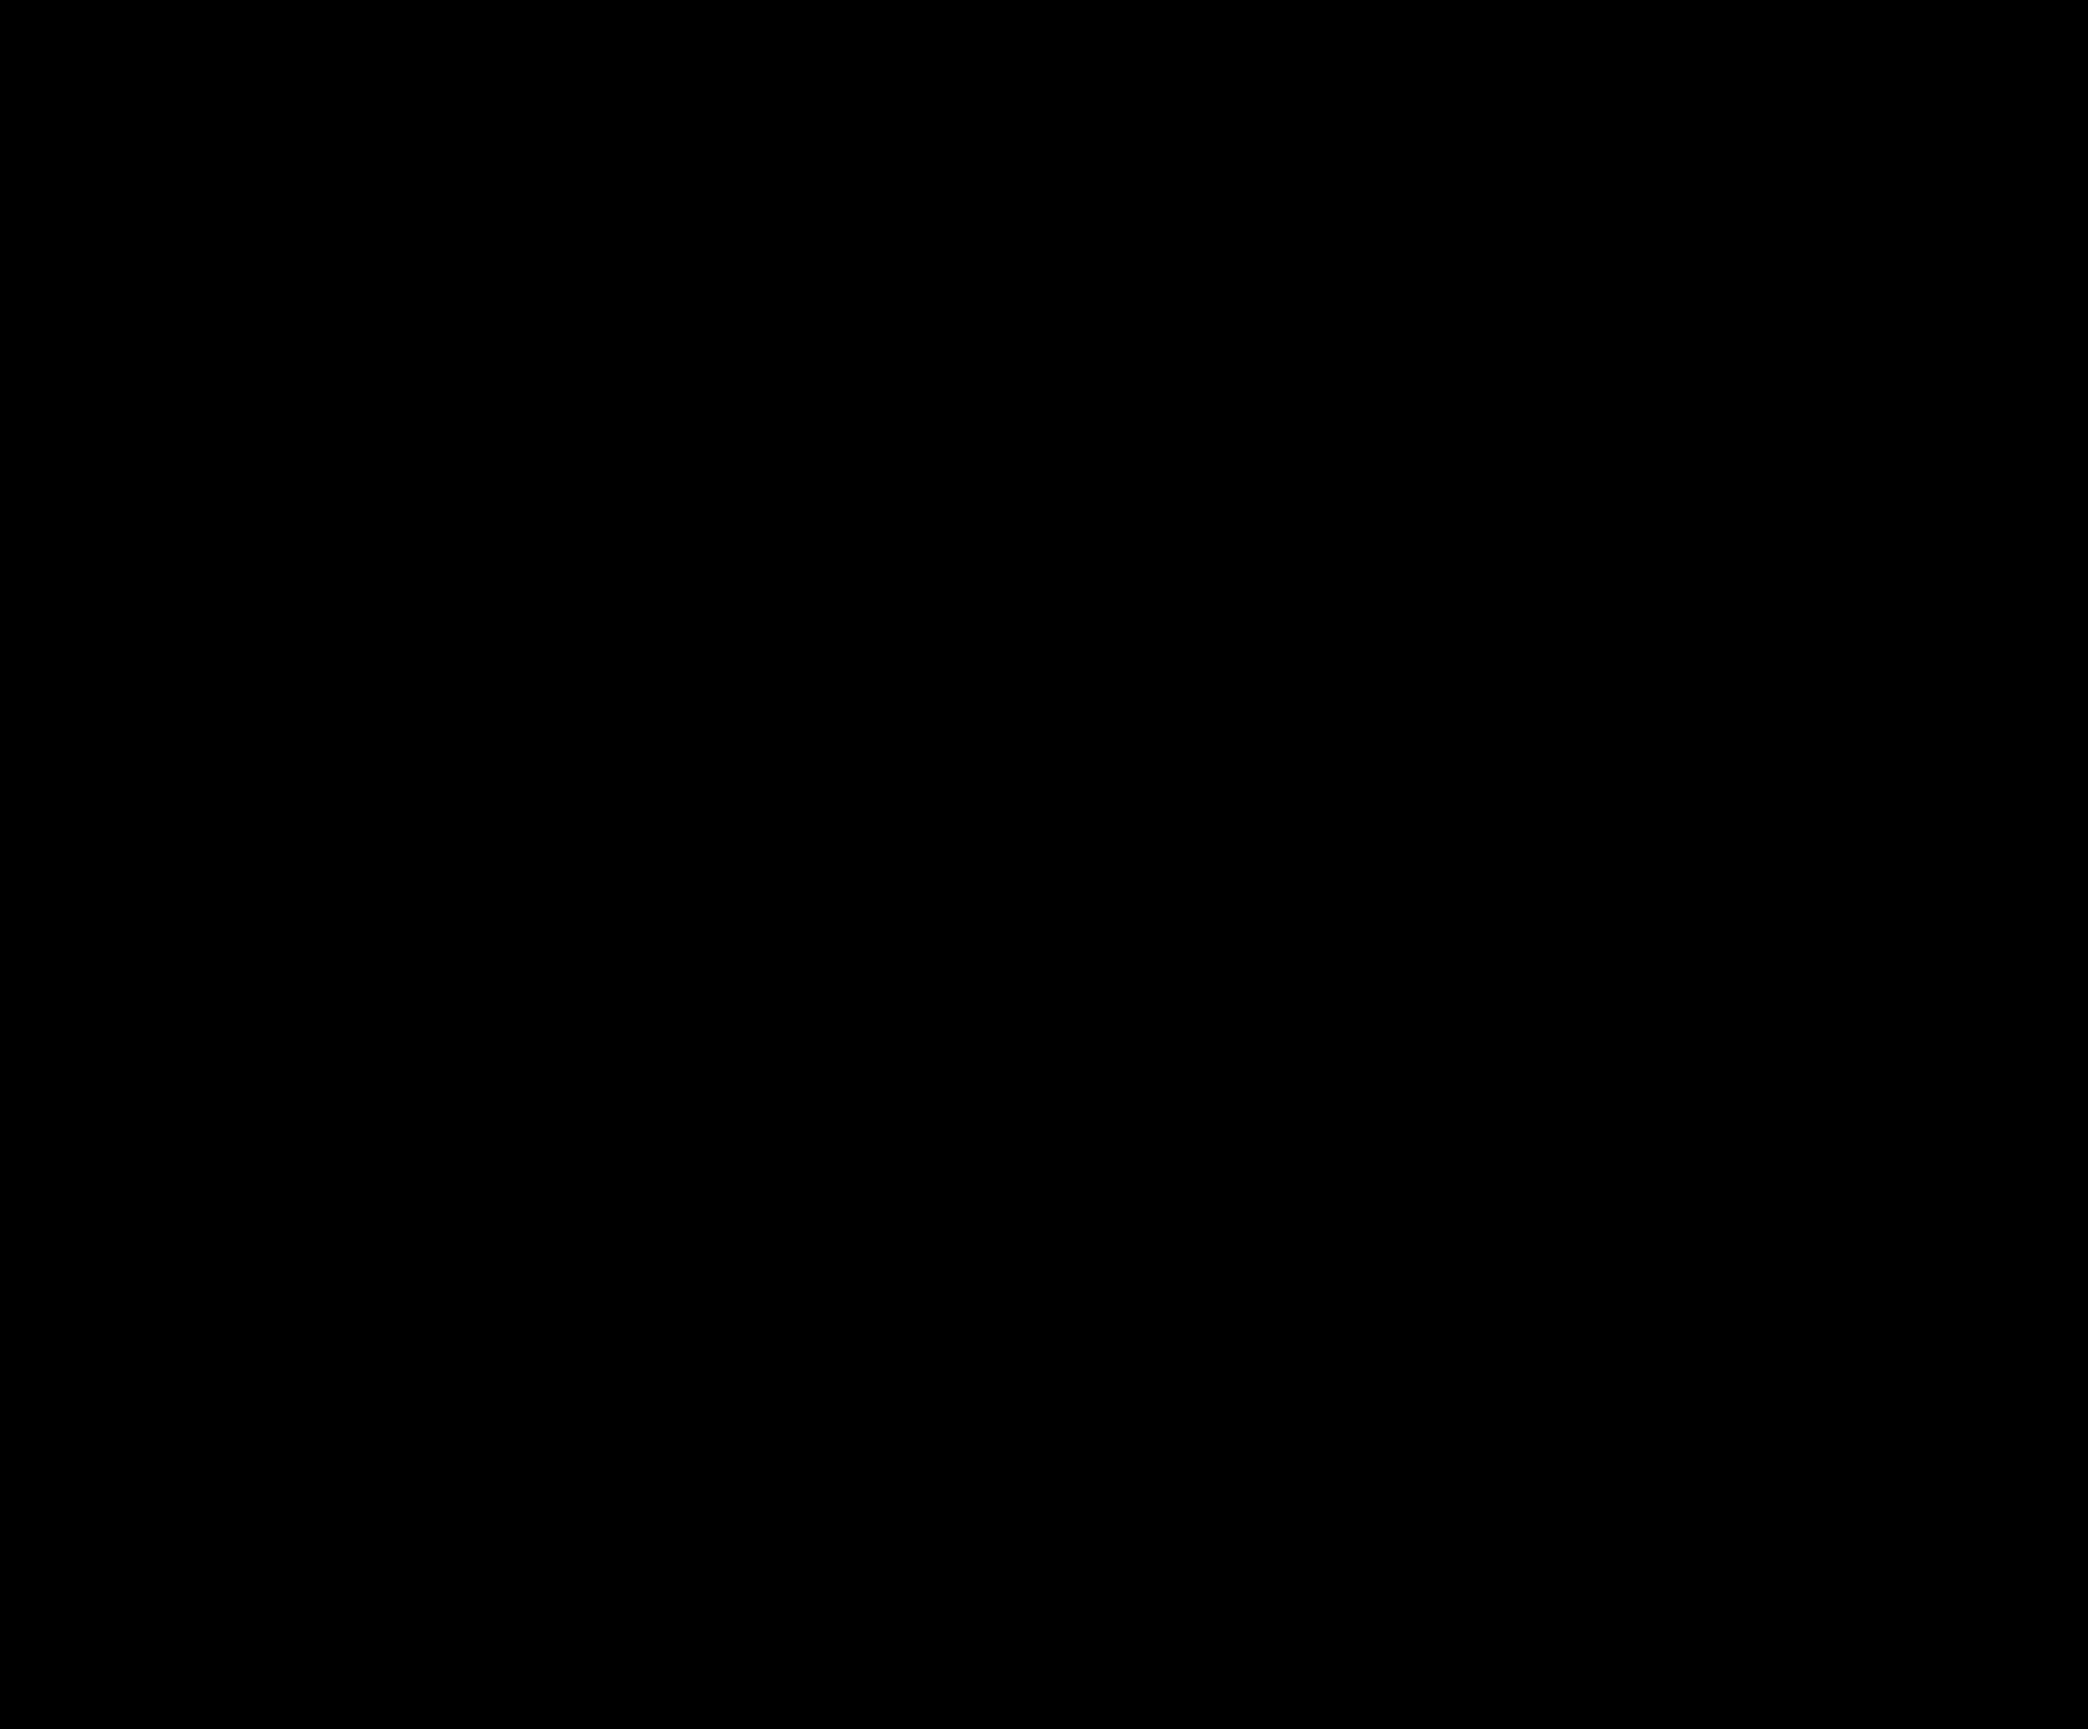
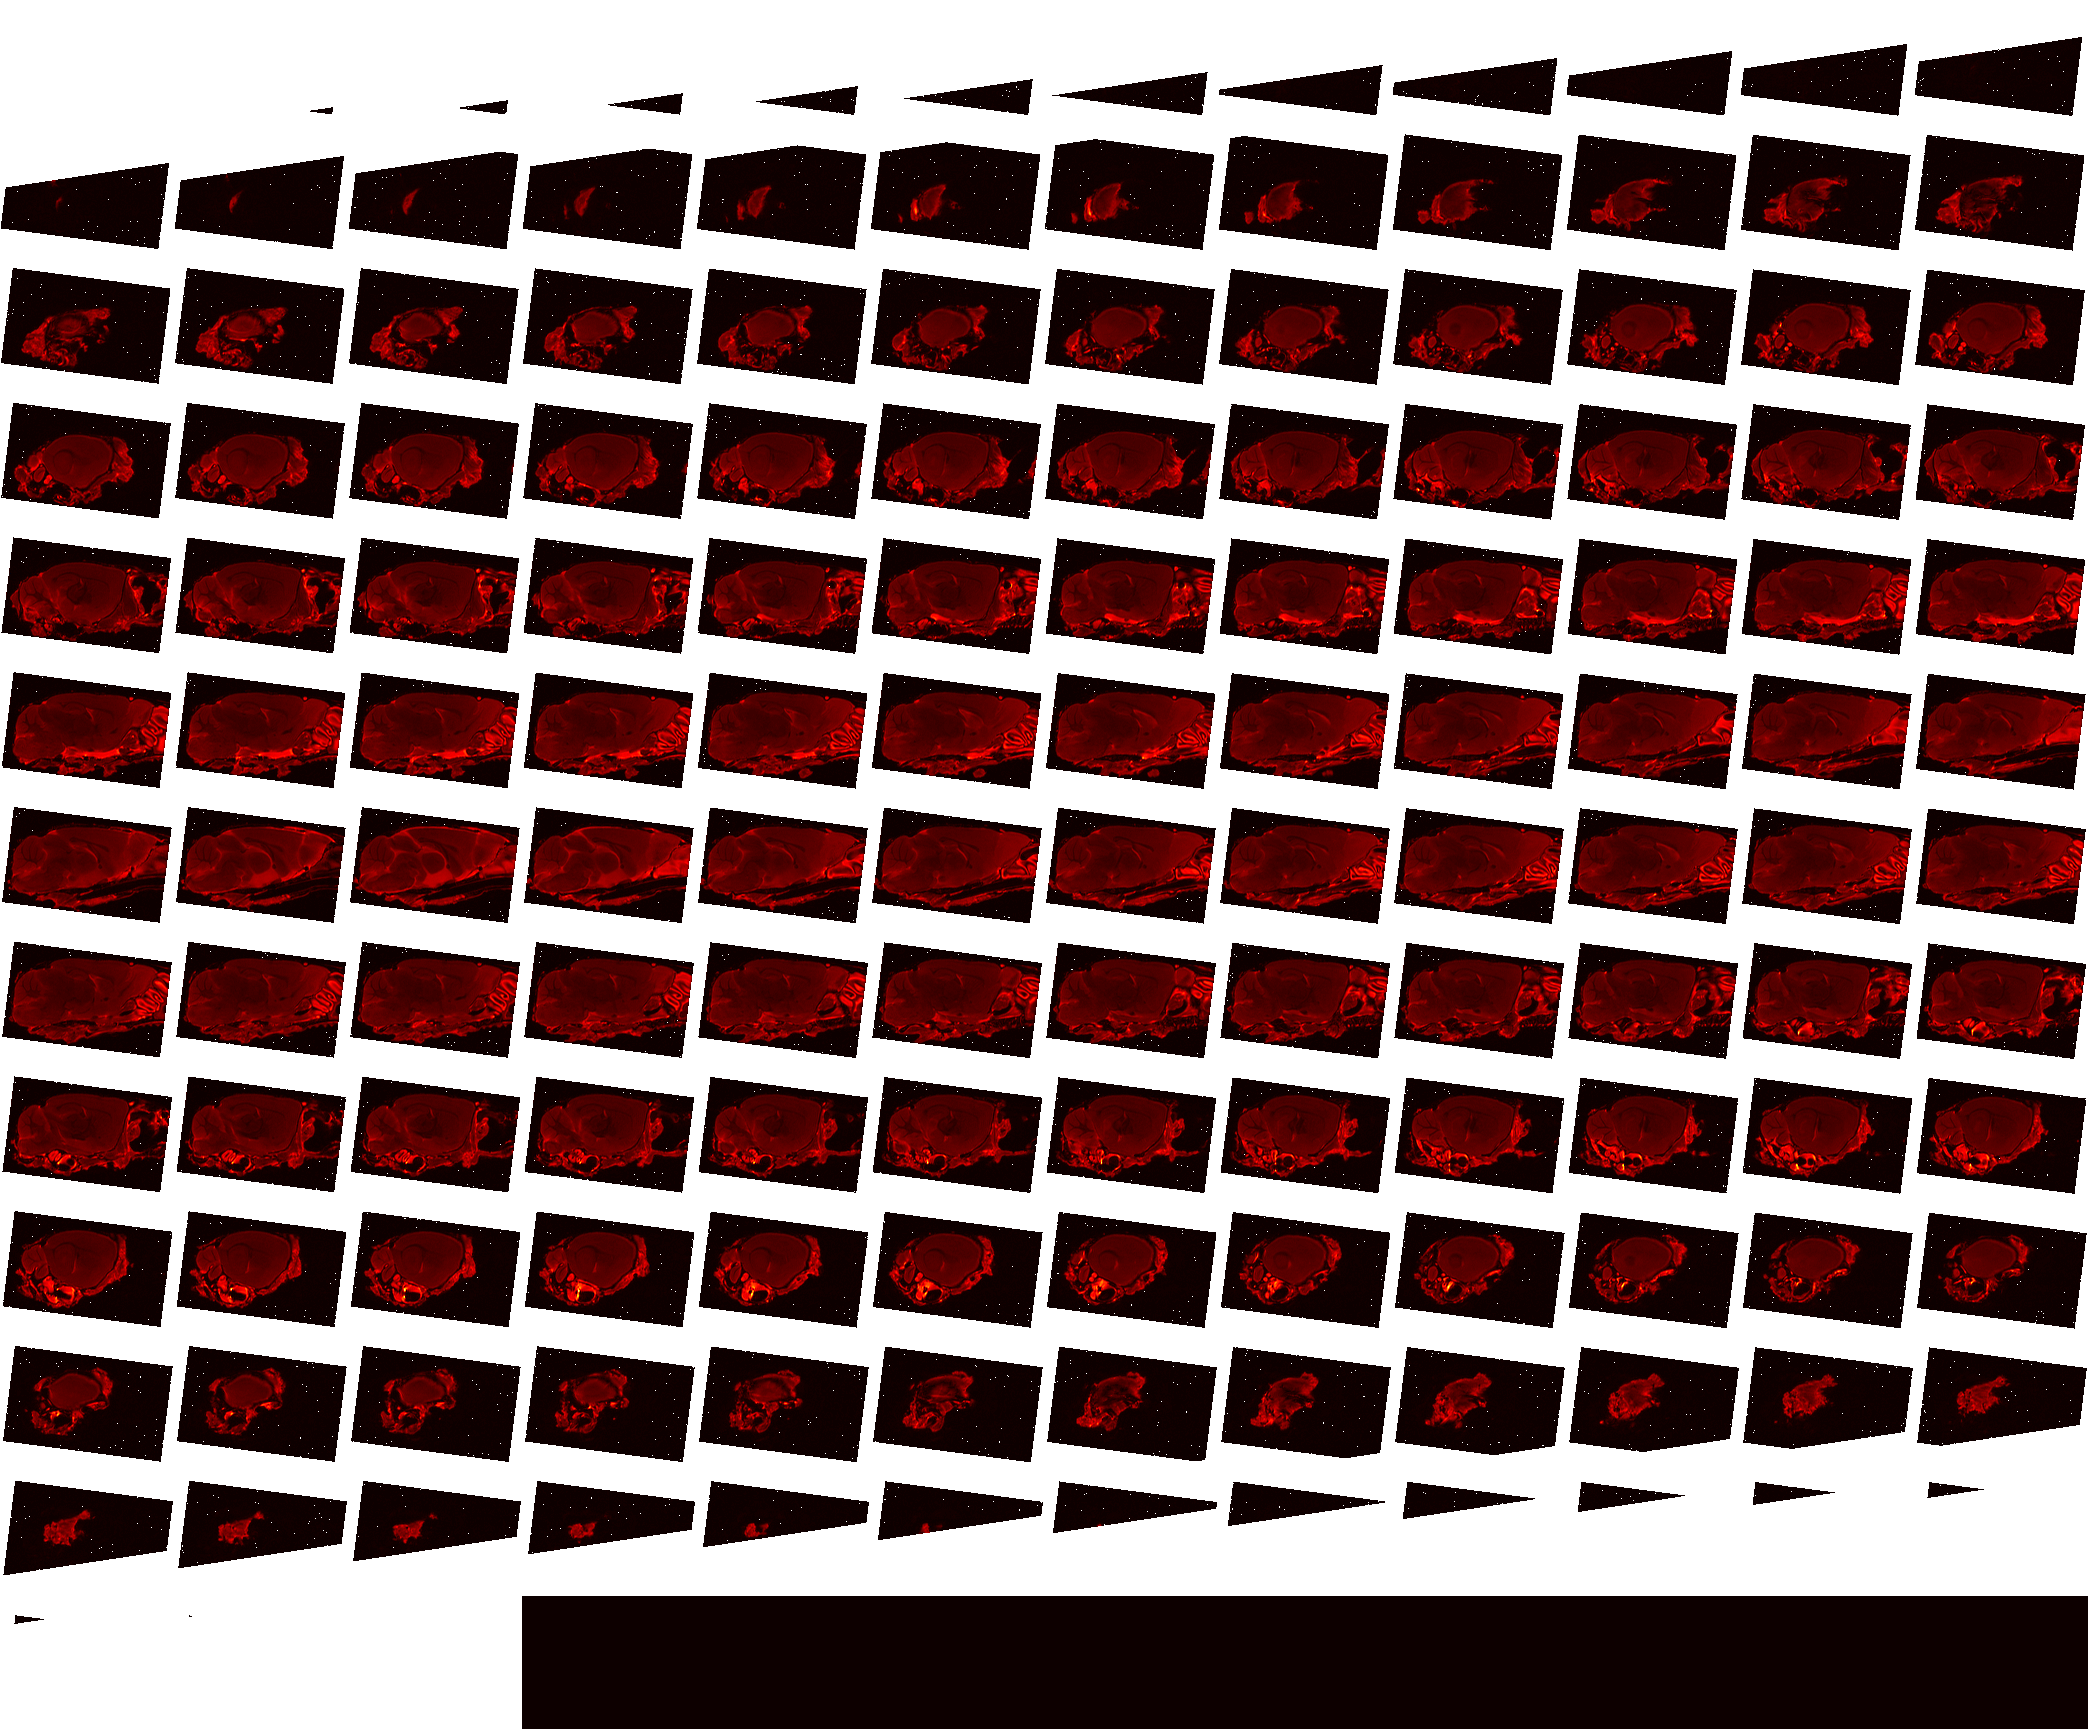

In [65]:
from IPython.display import display

display(plotting.view_img(raw_img, bg_img=None, cmap='cold_hot', black_bg=True, threshold=1))

In [66]:
import plotly.graph_objects as go

In [67]:
image

array([[[4.58827211, 2.1426365 , 0.80078334, ..., 1.88292299,
         2.44563561, 3.05163381],
        [4.9345568 , 3.85241715, 0.3029991 , ..., 3.93898832,
         4.0039167 , 4.48005814],
        [6.34133834, 5.86519689, 5.97341086, ..., 0.9306401 ,
         4.54498652, 4.28527301],
        ...,
        [4.43677256, 3.63598922, 1.73142344, ..., 7.16376447,
         3.09491939, 4.78305725],
        [4.06884508, 3.24641895, 4.17705904, ..., 7.51004916,
         3.74420318, 4.58827211],
        [4.50170094, 4.26363022, 3.05163381, ..., 5.02112797,
         3.80913156, 2.35906443]],

       [[1.55828109, 2.94341984, 3.72256039, ..., 3.15984777,
         4.09048787, 3.59270363],
        [5.45398383, 3.85241715, 3.00834822, ..., 2.83520588,
         3.33299012, 5.04277076],
        [4.22034463, 4.35020139, 2.72699191, ..., 3.83077436,
         3.05163381, 3.76584598],
        ...,
        [4.95619959, 2.05606533, 1.81799461, ..., 4.45841535,
         3.13820498, 4.54498652],
        [3.0

In [68]:
# fig = go.Figure(data=go.Surface(z=image))
# fig.show()

In [69]:
import itk
import itkwidgets

In [70]:
image = itk.imread('../data/new_data/raw/T2_UT168.nii')

NiftiImageIO (0x92dc080): ../data/new_data/raw/T2_UT168.nii has unexpected scales in sform

NiftiImageIO (0x92dc080): ../data/new_data/raw/T2_UT168.nii has unexpected scales in sform



# Testing OpenCV to fill some gaps in the mask

In [71]:
mask_img = nib.load('../data/new_mask/T2_UT168_mask.nii')
mask_img

In [72]:
image_mask = mask_img.get_fdata()
image_mask

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [73]:
# before applying CV morphologyEX
def ploting(image):
    fig_rows = 4
    fig_cols = 4
    n_subplots = fig_rows * fig_cols
    n_slice = image.shape[0]
    step_size = n_slice // n_subplots
    plot_range = n_subplots * step_size
    start_stop = int((n_slice - plot_range) / 2)

    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

    for idx, img in enumerate(range(start_stop, plot_range, step_size)):
        axs.flat[idx].imshow(ndi.rotate(image[img, :, :], 90), cmap='gray')
        axs.flat[idx].axis('off')
            
    plt.tight_layout()
    plt.show()

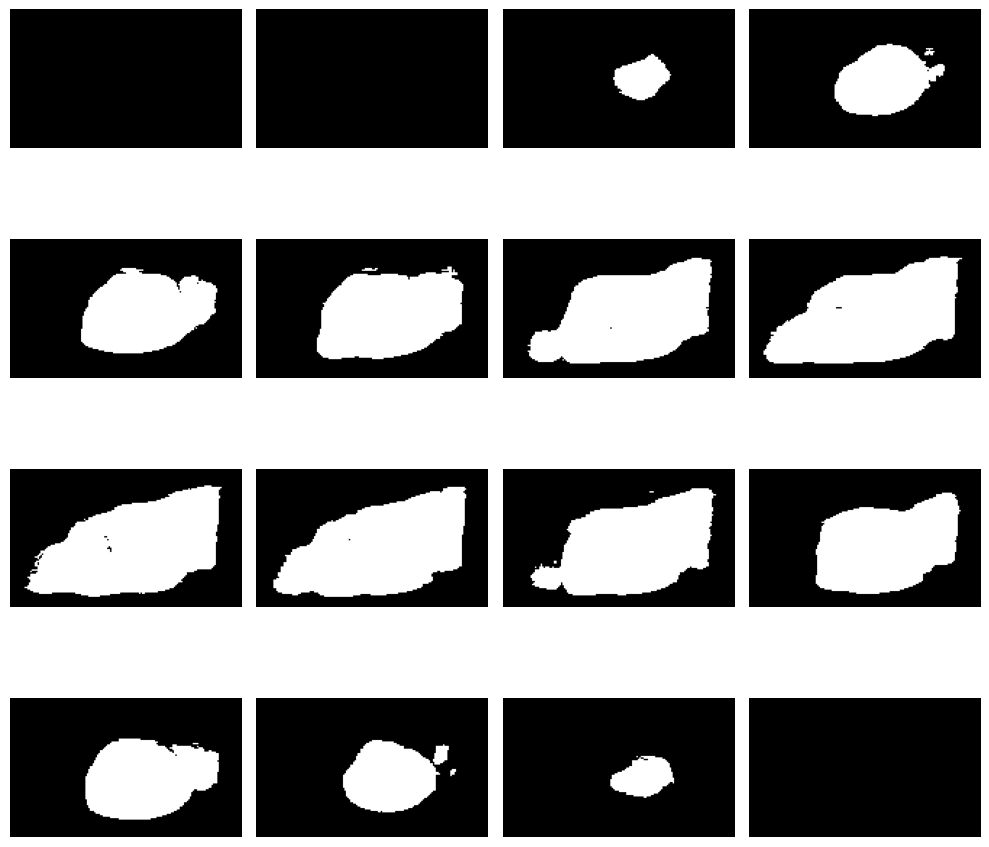

In [74]:
ploting(image_mask)

In [75]:
import cv2 as cv

In [76]:
kernel = np.ones((5,5),np.uint8)

In [77]:
closing = cv.morphologyEx(image_mask, cv.MORPH_CLOSE, kernel)
closing

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

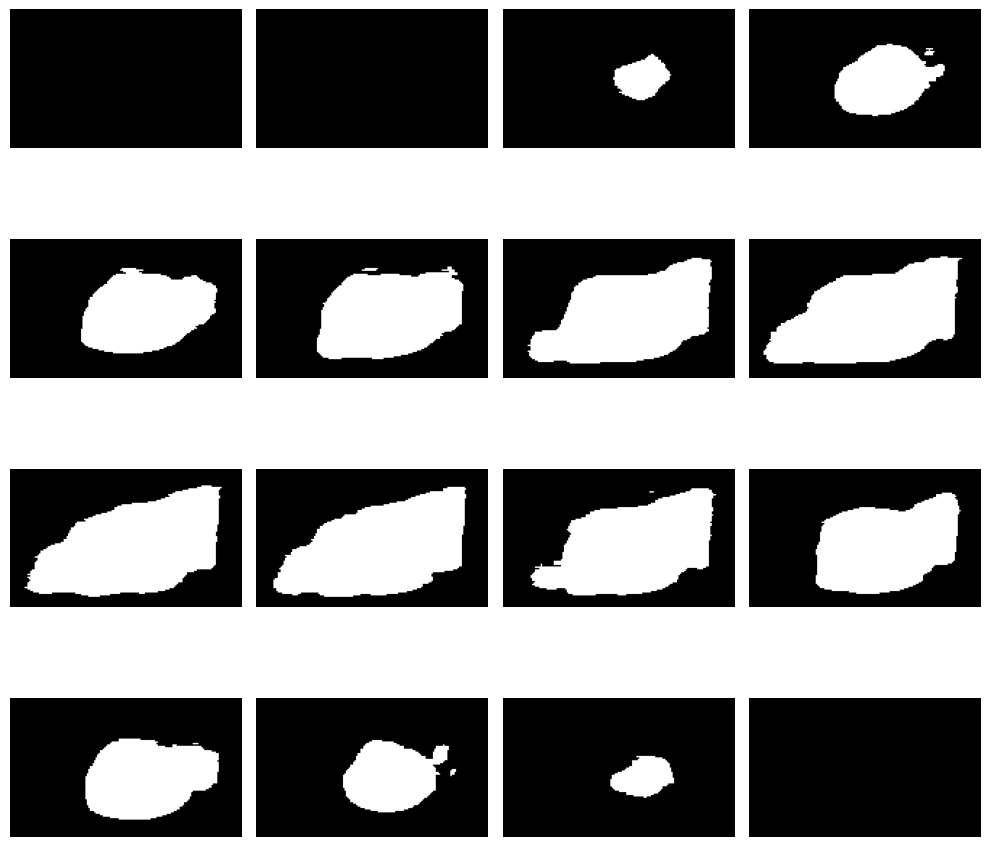

In [78]:
# after applying morphologyEx
ploting(closing)

In [79]:
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)

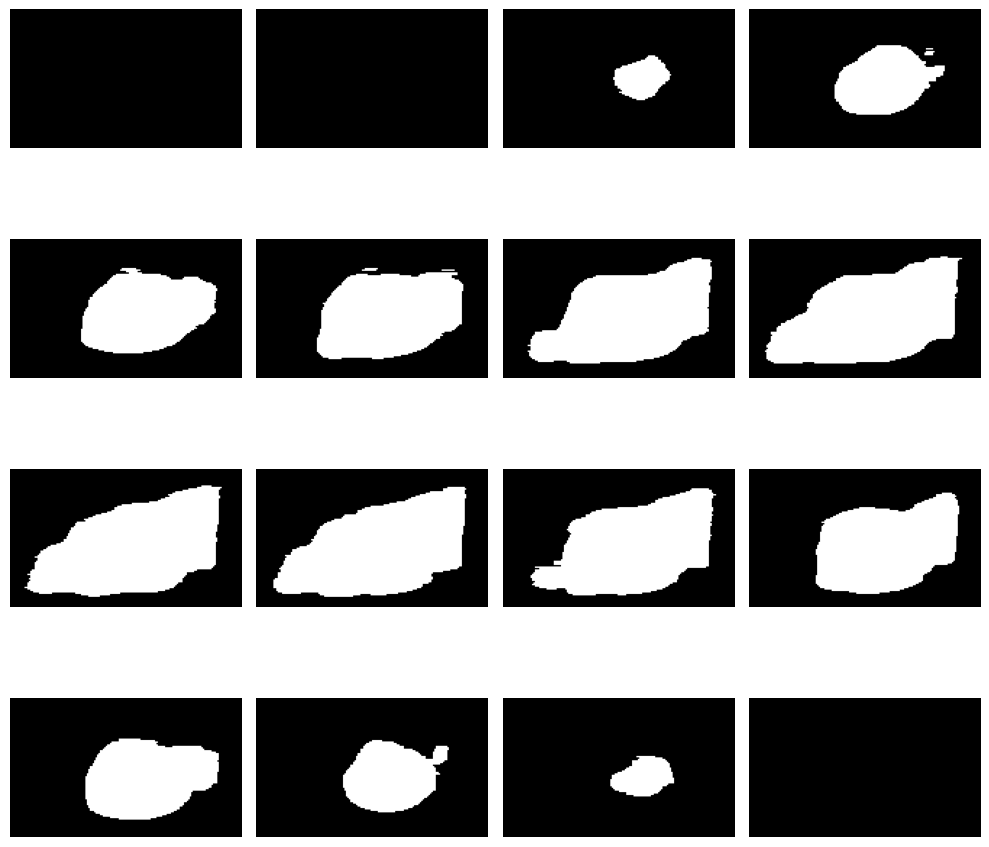

In [80]:
ploting(opening)

# Applying image transformation to reduce noise ouside

In [81]:
# loading img
img = nib.load('../data/final_generated_masks/mask/UT098_mask.nii')

In [82]:
data = img.get_fdata()

In [83]:
contour_slices = []

# Before procedure

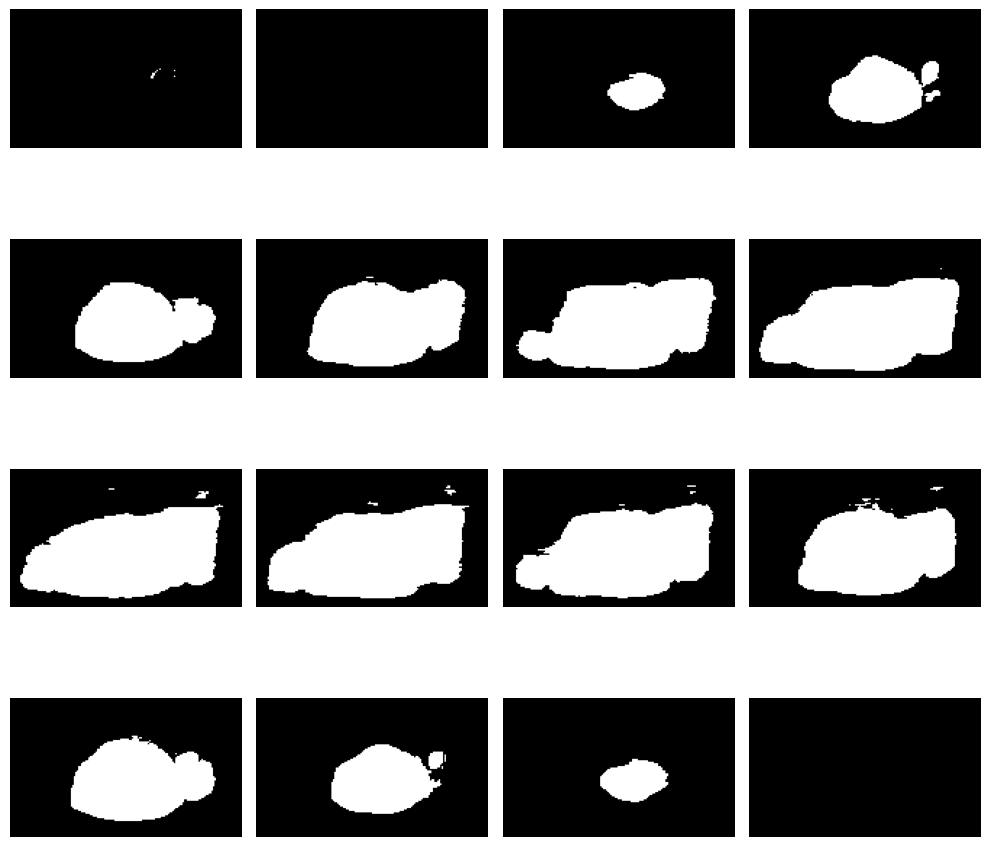

In [84]:
ploting(data)

In [85]:
import cv2

# since it is 3D image we will need to slice it
for i in range(data.shape[2]):

    slice = data[:, :, i]
    slice = cv2.normalize(slice, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    contours, _ = cv2.findContours(slice, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

 
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        largest_contour_mask = np.zeros_like(slice)
        cv2.drawContours(largest_contour_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)
        contour_slices.append(largest_contour_mask)


contour_slices = np.stack(contour_slices, axis=2)

In [86]:
# fig_rows = 4
# fig_cols = 4
# n_subplots = fig_rows * fig_cols
# n_slice = contour_slices.shape[2]
# step_size = n_slice // n_subplots
# plot_range = n_subplots * step_size
# start_stop = int((n_slice - plot_range) / 2)

# fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

# for idx, img in enumerate(range(start_stop, start_stop+plot_range, step_size)):
#     axs.flat[idx].imshow(ndi.rotate(contour_slices[:, :, img], 90), cmap='gray')
#     axs.flat[idx].axis('off')
        
# plt.tight_layout()
# plt.show()

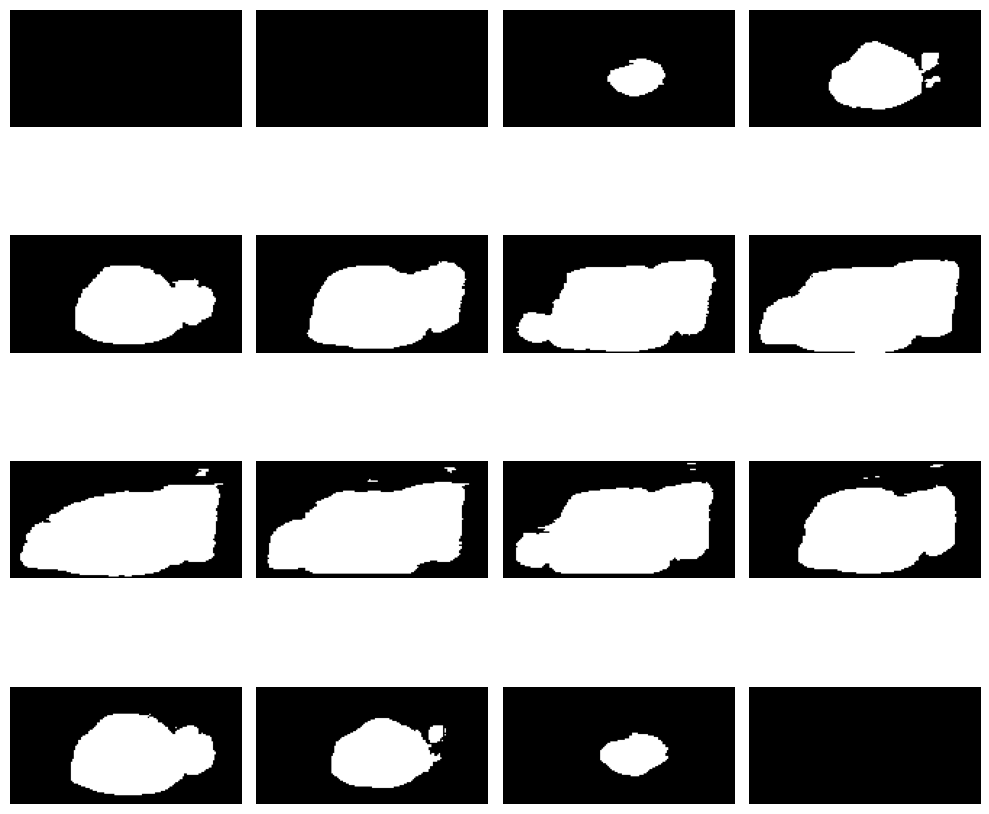

In [87]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = contour_slices.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(contour_slices[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

#### Some noise has been removed, but the noise still exist

In [89]:
processed_img = nib.load('../data/processed_data/UT100_mask.nii')
vis_img = processed_img.get_fdata()

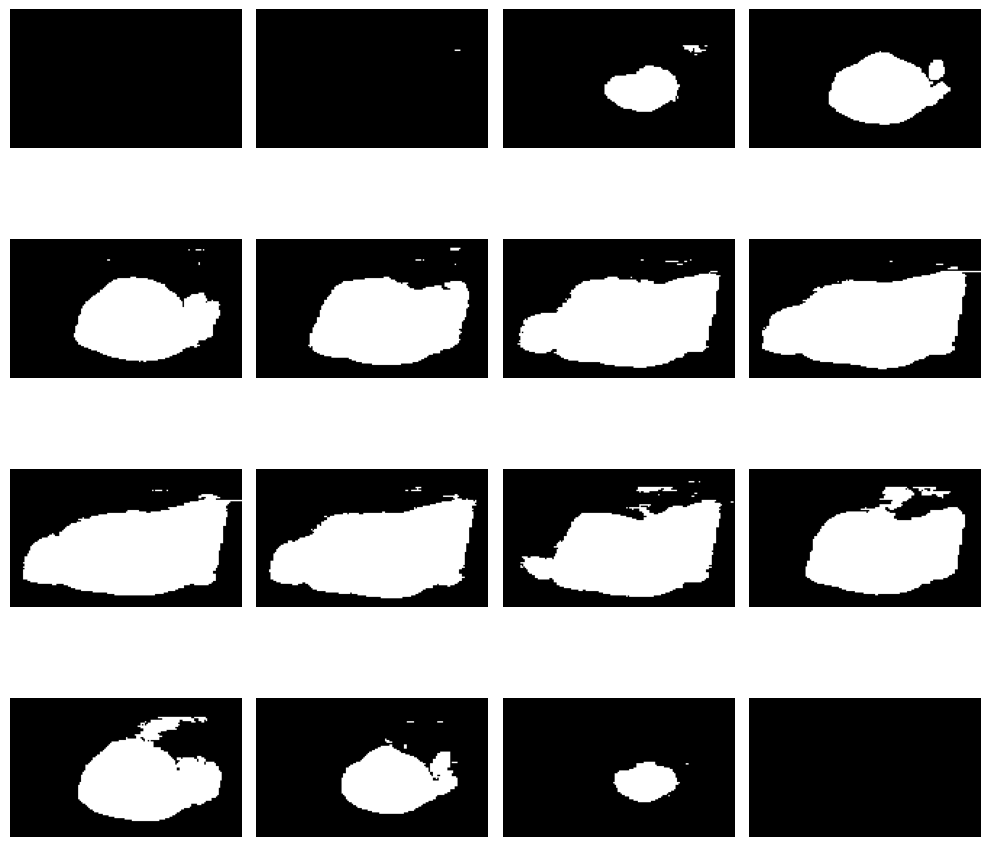

In [90]:
ploting(vis_img)

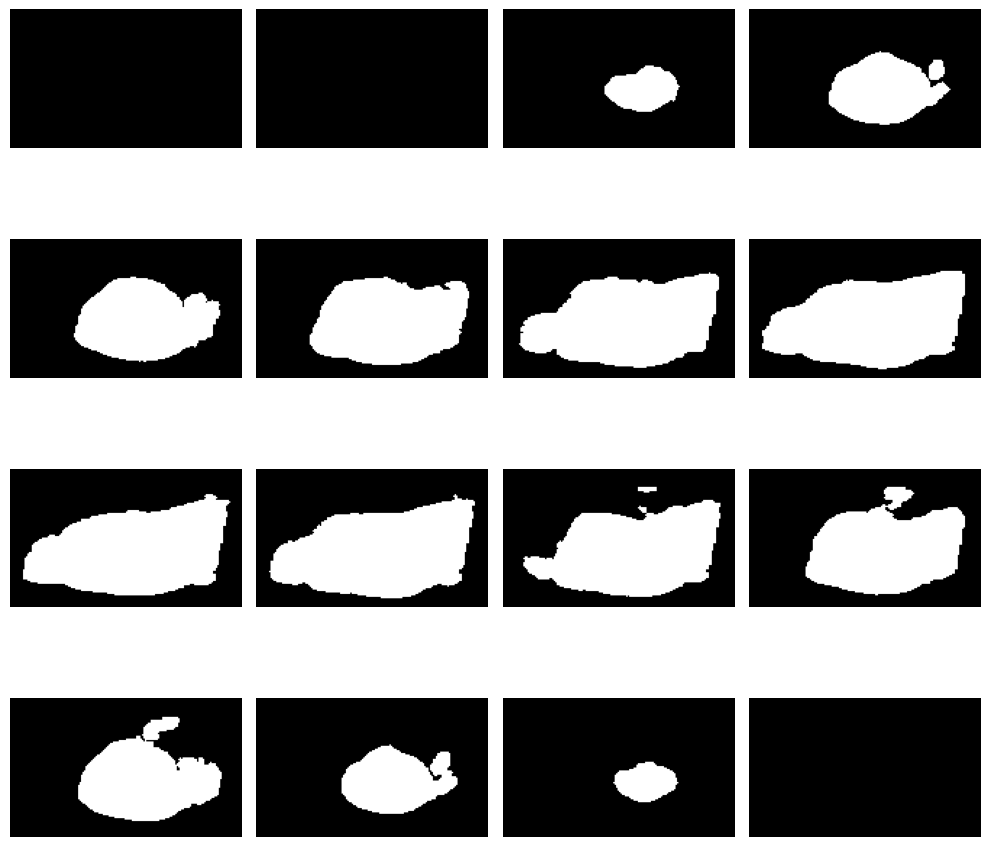

In [132]:
from skimage.morphology import opening, ball
from scipy.ndimage import generate_binary_structure
from skimage.measure import label, regionprops

def clean_mask_advanced(mask, volume_threshold=500, opening_size=0.9):
    selem = generate_binary_structure(3, 2)
    mask_opened = opening(mask, selem)

    labeled_mask = label(mask_opened)

    # Identify regions above the volume threshold
    regions = regionprops(labeled_mask)
    large_regions = [r for r in regions if r.area > volume_threshold]

    # Create a clean mask
    cleaned_mask = np.zeros_like(mask)
    for region in large_regions:
        cleaned_mask[labeled_mask == region.label] = 1

    return cleaned_mask

# Use the function
cleaned_mask_advanced = clean_mask_advanced(vis_img)

# Visualize it
ploting(cleaned_mask_advanced)

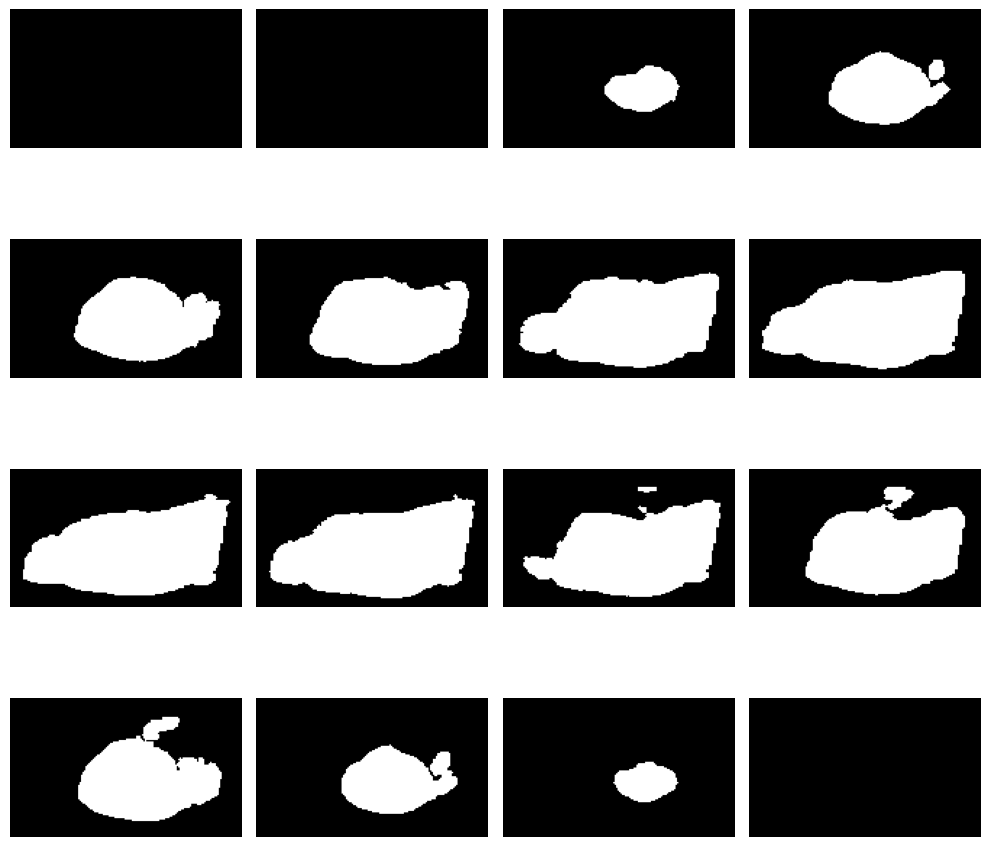

In [114]:
def ploting_to_png(image, filename):
    fig_rows = 4
    fig_cols = 4
    n_subplots = fig_rows * fig_cols
    n_slice = image.shape[0]
    step_size = n_slice // n_subplots
    plot_range = n_subplots * step_size
    start_stop = int((n_slice - plot_range) / 2)

    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

    for idx, img in enumerate(range(start_stop, plot_range, step_size)):
        axs.flat[idx].imshow(ndi.rotate(image[img, :, :], 90), cmap='gray')
        axs.flat[idx].axis('off')
            
    plt.tight_layout()
    
    # Save the figure as a PNG file
    plt.savefig(filename + '.png', dpi=300)

    plt.show()

# Use the function and save the visualization
ploting_to_png(cleaned_mask_advanced, 'cleaned_mask_advanced')

In [ ]:
# after transformations
ploting_to_png(cleaned_mask_advanced, 'cleaned_mask_before')

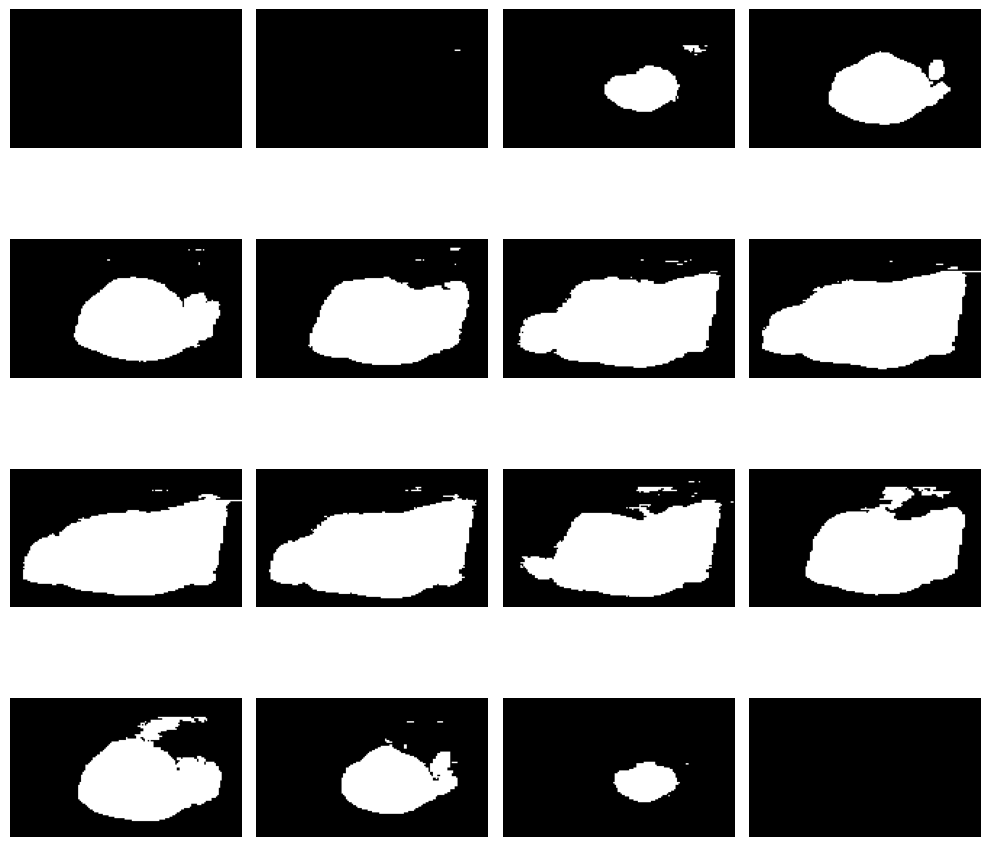

In [115]:
# visualizing before transformation 
ploting_to_png(vis_img, 'cleaned_mask_before')

# Looking for optimal treshold

In [130]:
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt


labeled_mask = label(vis_img)
print(labeled_mask)


regions = regionprops(labeled_mask)
print(regions)

areas = [r.area for r in regions]
print(areas)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[<skimage.measure._regionprops.RegionProperties object at 0x7fc1e9b8ee00>, <skimage.measure._regionprops.RegionProperties object at 0x7fc1ea197b50>, <skimage.measure._regionprops.RegionProperties object at 0x7fc1ea197af0>, <sk

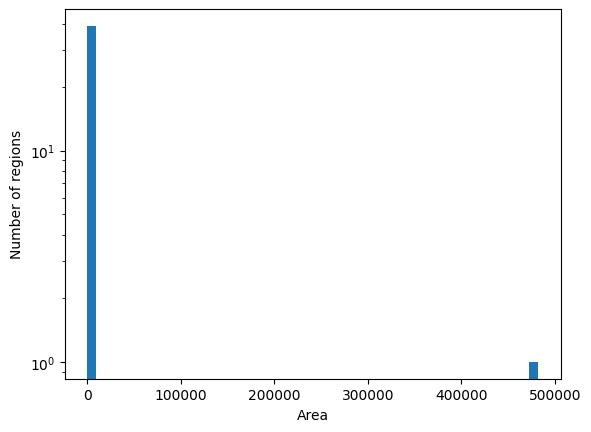

In [131]:
plt.hist(areas, bins=50, log=True)  
plt.xlabel('Area')
plt.ylabel('Number of regions')
plt.show()